## Imports et fonctions

# Importation des données

In [10]:
# !pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rfm_total = pd.read_csv("data/rfm_total.csv")
rfm_data = pd.read_csv("data/rfm_data.csv")

### RFM total

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# rfm_total = getRfmNewData('201701', '201808')

num_clusters = 3

encoder = OrdinalEncoder()
rfm_total[["fav_categ", "fav_payment_type"]] = encoder.fit_transform(rfm_total[["fav_categ", "fav_payment_type"]])

# Standarisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(rfm_total.drop(['customer_unique_id', 'period','last_order'], axis=1))

kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42)
kmeans.fit(df_scaled)

rfm_total['Cluster'] = kmeans.labels_

rfm_total

,customer_unique_id,period,last_order,frequency,monetary_value,total_dep_by_customer,nb_products_buy,volume_product_cm3,fav_categ,eval_mean_per_customer,nb_of_comment,fav_payment_type,satisfaction_client,recency,Cluster
0,2ce5d2f1052c47331ae94aa3551f15ed,201708,2017-08-04 11:35:21,1,40.00,40.00,1,4212.0,67.0,5.0,0.0,0.0,1.0,392,1
1,65811efa36585c22a9931b8480af1f22,201803,2018-03-07 19:30:10,1,153.39,153.39,1,71944.0,14.0,4.0,1.0,0.0,1.0,177,1
2,8021302579cee7312c300290e35d490e,201803,2018-03-21 12:59:12,1,42.77,42.77,1,5776.0,33.0,1.0,1.0,1.0,0.0,163,0
3,96b5b2e02beee64d4767aa546b4984ef,201801,2018-01-21 21:42:20,1,158.30,158.30,1,2816.0,0.0,2.0,1.0,1.0,0.0,222,0
4,59a17dcfcbfb81e6426ba122a8bbf5cb,201806,2018-06-24 07:54:55,1,40.24,40.24,1,4096.0,14.0,4.0,0.0,1.0,1.0,68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95255,48804d0ed0bd01583e1caed259cd5173,201808,2018-08-04 14:32:10,1,122.19,122.19,1,42875.0,55.0,5.0,1.0,1.0,1.0,27,1
95256,49e1dff368c6752f5c1319f3c988bfc9,201705,2017-05-06 16:22:40,1,134.59,134.59,1,6000.0,33.0,1.0,1.0,1.0,0.0,482,0
95257,8be86c3fec7d014912cb7a747de3a15c,201803,2018-03-22 12:47:22,1,142.43,142.43,1,112500.0,46.0,4.0,1.0,1.0,1.0,162,1
95258,08e9efd97973878416e24dfa610bc8af,201806,2018-06-24 20:05:42,1,534.10,534.10,1,5184.0,49.0,5.0,0.0,1.0,1.0,68,1


### RFM sur le futur

In [6]:
# rfm_data = getRfmNewData('201709', '201808')

encoder = OrdinalEncoder()
rfm_data[["fav_categ", "fav_payment_type"]] = encoder.fit_transform(rfm_data[["fav_categ", "fav_payment_type"]])

# Standarisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(rfm_data.drop(['customer_unique_id', 'period','last_order'], axis=1))

kmeans_data = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42)
kmeans_data.fit(df_scaled)

rfm_data['Cluster'] = kmeans_data.labels_

rfm_data

,customer_unique_id,period,last_order,frequency,monetary_value,total_dep_by_customer,nb_products_buy,volume_product_cm3,fav_categ,eval_mean_per_customer,nb_of_comment,fav_payment_type,satisfaction_client,recency,Cluster
0,e9a340c07aefc78ddfb8fdc578b42fc3,201804,2018-04-12 19:21:52,1,39.44,39.44,1,3584.0,70.0,3.0,1.0,1.0,0.0,141,0
1,77338b259868d54b539b0296b01fc635,201808,2018-08-27 22:12:59,1,35.42,35.42,1,3328.0,2.0,5.0,0.0,2.0,1.0,4,2
2,f9b074cca28d2f4143036e8eec7eb60b,201803,2018-03-21 14:20:32,1,96.92,96.92,1,81634.0,51.0,5.0,1.0,3.0,1.0,163,2
3,f9df0a394fdd97a23a8bc2f088c1c03e,201804,2018-04-02 09:33:05,1,85.62,85.62,1,5292.0,45.0,5.0,0.0,0.0,1.0,151,2
4,21559d7ff0ebff720e5e160184338fed,201807,2018-07-20 01:00:51,1,91.23,91.23,1,27000.0,41.0,5.0,1.0,1.0,1.0,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52065,01b0e04852a70de5404609e82e8fc0ba,201801,2018-01-08 09:35:21,1,116.84,116.84,1,11907.0,67.0,5.0,0.0,0.0,1.0,235,2
52066,9a0ee875afc94eecc7f41411782c13b0,201804,2018-04-23 17:22:26,1,209.06,209.06,1,11132.0,63.0,5.0,1.0,1.0,1.0,130,2
52067,46331de5743a5df02a06f1148c87f7fe,201801,2018-01-29 22:07:58,1,113.91,113.91,1,45968.0,56.0,4.0,0.0,1.0,1.0,214,2
52068,497242169577b9fdbaaa4286a575191e,201807,2018-07-03 09:49:11,1,43.52,43.52,1,7680.0,14.0,3.0,0.0,1.0,0.0,59,0


In [7]:
# Obtenir les étiquettes de cluster attribuées par le k-means
cluster_labels = kmeans_data.labels_

# Supposons que vous ayez également un dataframe final avec les étiquettes de cluster réelles
# qui représentent la vérité terrain (ground truth) des clusters
# Vous pouvez le charger dans un dataframe 'ground_truth'

# Calculer l'indice de Rand ajusté entre les clusters prédits et les clusters réels (ground truth)
ari = adjusted_rand_score(rfm_data['Cluster'], cluster_labels)

# Afficher l'indice de Rand ajusté
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 1.0


In [8]:
ari_df = pd.DataFrame(columns=['Period', 'ARI'])

num_clusters = 3

periods = [
    '201701',
    '201702',
    '201703',
    '201704',
    '201705',
    '201706',
    '201707',
    '201708',
]

periods = periods[::-1]

cumulative_df = None

mois = 0

# Pour chaque échantillon temporel, effectuer le clustering et calculer l'ARI
for period in periods:
    # rfm_i =  getRfmNewData(start_period, end_period)
    rfm_i = rfm_total[rfm_total["period"] == period]

    if cumulative_df is None:
        cumulative_df = rfm_data.copy()
    else:
        cumulative_df = pd.concat((cumulative_df, rfm_i), ignore_index=True)


    encoder = OrdinalEncoder()
    cumulative_df[["fav_categ", "fav_payment_type"]] = encoder.fit_transform(cumulative_df[["fav_categ", "fav_payment_type"]])

    # Réduction de la variabilité avec PCA
    # pca = PCA(n_components=4)  # Réduisez le nombre de composantes selon votre besoin
    # train_pca = pca.fit_transform(rfm_i[columns])
    train_pca = cumulative_df.drop(["customer_unique_id", "period",'last_order'], axis=1)

    # Prétraiter les données
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_pca)

    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42)
    kmeans.fit(train_scaled)

    cluster_labels = kmeans.predict(train_scaled)

    # origin_labels = kmeans_origin.predict(cumulative_df)
    # origin_labels = kmeans_all.predict(train_scaled)

    ari = adjusted_rand_score(cumulative_df["Cluster"], cluster_labels)

    # Ajouter l'ARI au DataFrame
    ari_df = pd.concat([ari_df, pd.DataFrame([[mois, ari]], columns=['Period', 'ARI'])], ignore_index=True)

    mois += 1



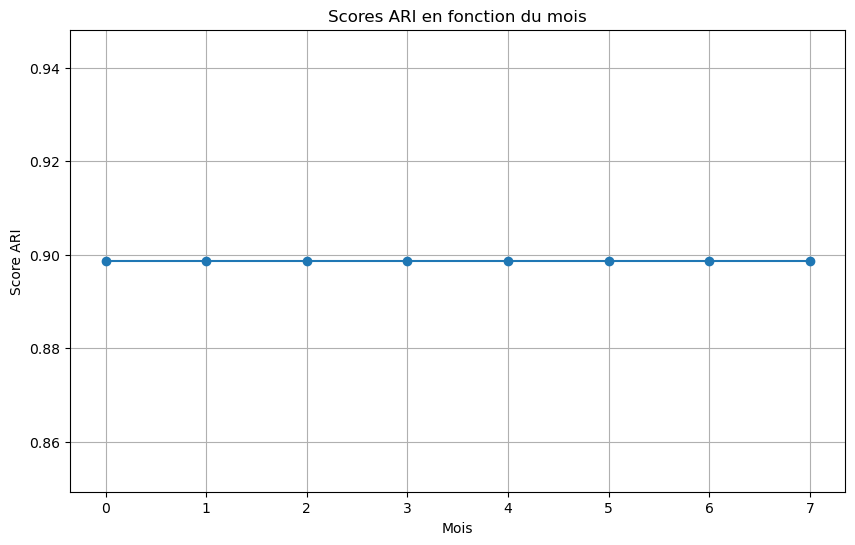

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(ari_df['Period'], ari_df['ARI'], marker='o', linestyle='-')
plt.title('Scores ARI en fonction du mois')
plt.xlabel('Mois')
plt.ylabel('Score ARI')
plt.grid(True)
plt.show()


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import OrdinalEncoder

num_clusters = 3

# Créez un DataFrame pour stocker les résultats ARI par trimestre
ari_df = pd.DataFrame(columns=['Trimestre', 'ARI'])

# Définissez le nombre de clusters
num_clusters = 3

# Définissez les trimestres
trimestres = [
    ['201701', '201702', '201703'],
    ['201704', '201705', '201706'],
    ['201707', '201708', '201709'],
]

# Initialisez une variable pour suivre le trimestre
trimestre_index = 1

cumulative_df = None

# Boucle à travers les trimestres
for trimestre in trimestres:
    # Créez une liste vide pour stocker les données de chaque mois du trimestre
    trimestre_data = []

    # Boucle à travers les mois du trimestre
    for period in trimestre:
        print('period : ', period)
        print('rfm_total["period"] : ', rfm_total["period"])
        rfm_i = rfm_total[rfm_total["period"] == period]
        print('rfm_i : ', rfm_i)
        if cumulative_df is None:
            cumulative_df = rfm_data.copy()
        else:
            cumulative_df = pd.concat((cumulative_df, rfm_i), ignore_index=True)

        encoder = OrdinalEncoder()
        cumulative_df[["fav_categ", "fav_payment_type"]] = encoder.fit_transform(cumulative_df[["fav_categ", "fav_payment_type"]])

        # Réduction de la variabilité avec PCA
        train_pca = cumulative_df.drop(["customer_unique_id", "period", 'last_order', 'Cluster'], axis=1)

        # Prétraitez les données
        scaler = StandardScaler()
        train_scaled = scaler.fit_transform(train_pca)

        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42)
        kmeans.fit(train_scaled)

        cluster_labels = kmeans.predict(train_scaled)

        ari = adjusted_rand_score(cumulative_df["Cluster"], cluster_labels)

        # Ajoutez l'ARI à la liste des résultats du trimestre
        trimestre_data.append(ari)

    # Calculez la moyenne des ARIs pour ce trimestre
    trimestre_ari_mean = sum(trimestre_data) / len(trimestre_data)

    # Ajoutez le résultat du trimestre au DataFrame
    ari_df = pd.concat([ari_df, pd.DataFrame([[trimestre_index, trimestre_ari_mean]], columns=['Trimestre', 'ARI'])], ignore_index=True)

    trimestre_index += 1

# Affichez les résultats
print(ari_df)


period :  201701
rfm_total["period"] :  0        201708
1        201803
2        201803
3        201801
4        201806
          ...  
95255    201808
95256    201705
95257    201803
95258    201806
95259    201712
Name: period, Length: 95260, dtype: int64
rfm_i :  Empty DataFrame
Columns: [customer_unique_id, period, last_order, frequency, monetary_value, total_dep_by_customer, nb_products_buy, volume_product_cm3, fav_categ, eval_mean_per_customer, nb_of_comment, fav_payment_type, satisfaction_client, recency, Cluster]
Index: []
period :  201702
rfm_total["period"] :  0        201708
1        201803
2        201803
3        201801
4        201806
          ...  
95255    201808
95256    201705
95257    201803
95258    201806
95259    201712
Name: period, Length: 95260, dtype: int64
rfm_i :  Empty DataFrame
Columns: [customer_unique_id, period, last_order, frequency, monetary_value, total_dep_by_customer, nb_products_buy, volume_product_cm3, fav_categ, eval_mean_per_customer, nb_of_co

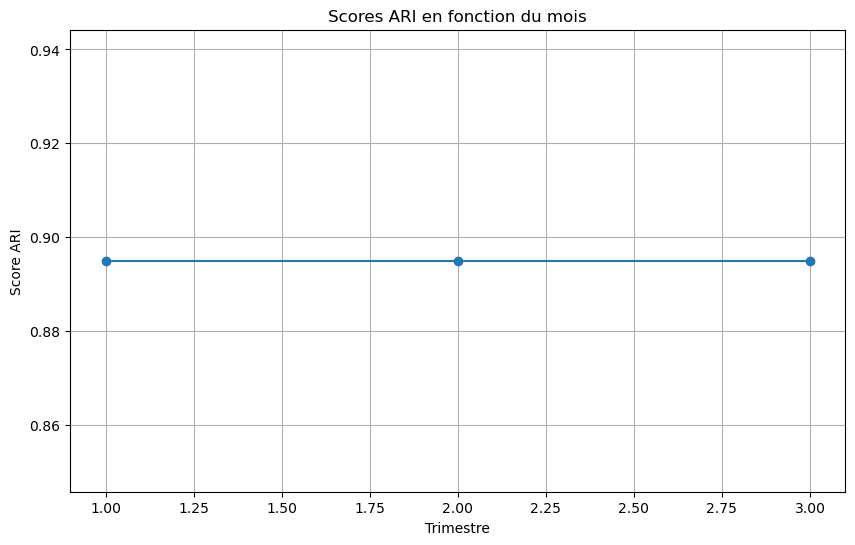

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(ari_df['Trimestre'], ari_df['ARI'], marker='o', linestyle='-')
plt.title('Scores ARI en fonction du mois')
plt.xlabel('Trimestre')
plt.ylabel('Score ARI')
plt.grid(True)
plt.show()

# Fin des blocs à récupérer